# Gradient Descent

**Goal: find the optimal parameters for a model without trying all combinations**

we use a linear model:

$\hat y = a_1x_1 + a_2x_2 + a_0 \cdot 1$

the model has 3 parameters (a0, a1, a2)

$\hat y = aX$

a is a vector of parameters, X is a matrix with our input training data. aX is a dot product of a vector and a matrix.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset("penguins").dropna()
df["bias"] = 1
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bias
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1


In [3]:
# select training data
X = df[["bill_depth_mm", "bill_length_mm", "bias"]]  # if you leave away the bias, the regression goes through the origin (0,0)
ytrue = df["body_mass_g"]

X.shape, ytrue.shape  # X is a 2D matrix, ytrue is a vector

((333, 3), (333,))

### Linear Model

In [6]:
def linear_model(X, a):
    # a: a vector of 3 parameters (3,)
    # X: a (N, 3) matrix
    # y = a1 * x1 + a2 * x2 + a0 * x0
    return np.dot(X, a)

In [7]:
a = np.array([1, 2, 3])      # arbitrary parameters for testing
yhat = linear_model(X, a)    # output is 1000 values for y
yhat.shape

(333,)

### Loss Function

In [12]:
def mse(ytrue, yhat):
    return ((ytrue - yhat) ** 2).sum() / ytrue.shape[0]

In [16]:
# test code
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a, b), 2) == 0.64  # if there is no error it is correct

In [17]:
mse(ytrue, ytrue)  # 0.0 is the smallest possible MSE value

np.float64(0.0)

### Gradient

$a_{new} = a_{old} - \eta \nabla loss(a)$

In [18]:
def partial_derivative(X, ytrue, a, index, mse_old, epsilon=0.001):
    """determine by how much we have to modify the indexed parameter"""
    a_change = a.copy()
    a_change[index] += epsilon                # modify parameter by small constant
    ypred_a = linear_model(X=X, a=a_change)   # predict with the modification
    mse_a = mse(ytrue, ypred_a)               # calculate new MSE
    return (mse_a - mse_old) / epsilon


def calc_gradient(X, ytrue, a):
    """calculate partial derivative for each parameter"""
    ypred = linear_model(X=X, a=a)   # prediction for y with the parameters we have now
    mse_old = mse(ytrue, ypred)
    return [
        partial_derivative(X, ytrue, a, index, mse_old)
        for index in range(3)
    ]

def gradient(X, y, a):
    """more accurate, based on actual derivative"""
    a1, a2, b = a[0], a[1], a[2]
    x1, x2 = X["x1"], X["x2"]
    
    slope_a1 = np.mean(a1 * x1**2 + a2 * x1 * x2 + b * x1 - x1 * y)
    slope_a2 = np.mean(a2 * x2**2 + a1 * x2 * x1 + b * x2 - x2 * y)
    slope_b = np.mean(b + a1 * x1 + a2 * x2 - y)
    
    return np.array([slope_a1, slope_a2, slope_b])

In [26]:
learning_rate = 0.00001

np.random.seed(42)            # set the seed value of the random number generator
a = np.random.random(size=3)  # random parameter vector

history = []
for i in range(100):    
    gradient = np.array(calc_gradient(X=X, ytrue=ytrue, a=a))
    a -= learning_rate * gradient
    ypred = linear_model(X=X, a=a)
    history.append(mse(ytrue, ypred))

#### Learning Curve

np.float64(460707.3108994741)

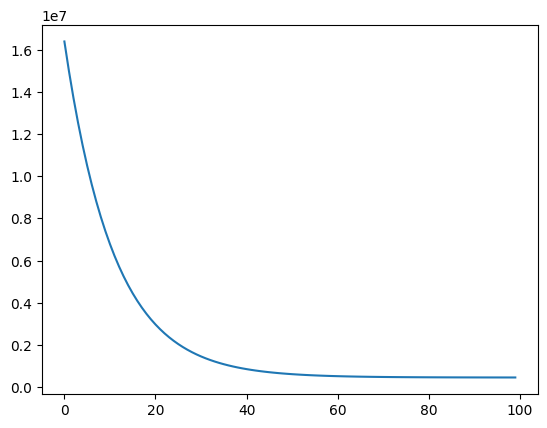

In [27]:
plt.plot(history)
history[-1]

### Implementation with Scikit

In [29]:
history[-1]

np.float64(460707.3108994741)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X, ytrue)
ypred = lr.predict(X)
mean_squared_error(ypred, ytrue)
#mse(ypred, ytrue)

344244.470226889